### Classification using Decision Trees
We have tried to solve the classification problem using logistic regression. One more popular category of solution are the decision trees. 

In [1]:
import pandas as pd
import numpy as np
base_data = pd.read_csv("Datasets/german.data.csv",header = None)
#print(base_data_2.head())
#base_data_2 = pd.read_csv("~/Downloads/german.data.csv",header = None)
base_data.columns = ['checkin_acc','duration','credit_history','purpose','amount',
                      'savings_acc','present_emp_since','inst_rate',
                      'personal_status','other_debters','residing_since','property','age','inst_plans','housing',
                      'num_credits','job','dependent_count','telephone','foreign_worker','status']
base_data['status'] = np.where(base_data['status']==1,0,1)
base_data.head()

selected_columns = ['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status']
base_data = base_data[selected_columns]

base_data.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [10]:
#Splitting data into Decision and Independent variables and then encoding the data

X_features = list(base_data.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [11]:
Y_variable = base_data.status
X_variable = pd.get_dummies(base_data[X_features],drop_first = True)

In [12]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_variable,Y_variable, test_size = 0.3, random_state = 1)

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

In [14]:
clf_tree.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=4)

In [16]:
from sklearn import metrics
tree_predict = clf_tree.predict(test_X)
metrics.roc_auc_score(test_Y,tree_predict)

0.6380134753314497

In [21]:
from sklearn import tree
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_8 <= 0.50
|   |--- feature_0 <= 22.50
|   |   |--- feature_12 <= 0.50
|   |   |   |--- feature_2 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_12 >  0.50
|   |   |   |--- feature_0 <= 11.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  11.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  22.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- feature_0 <= 47.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  47.50
|   |   |   |   |--- class: 1
|   |   |--- feature_16 >  0.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 0
|--- feature_8 >  0.50
|   |--- feature_25 <= 0.50
|   |   |--- feature_4 <= 25.50
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_4 >  25.50
|   |   |   |--- featu

In [22]:
import matplotlib.pyplot as plt

[]

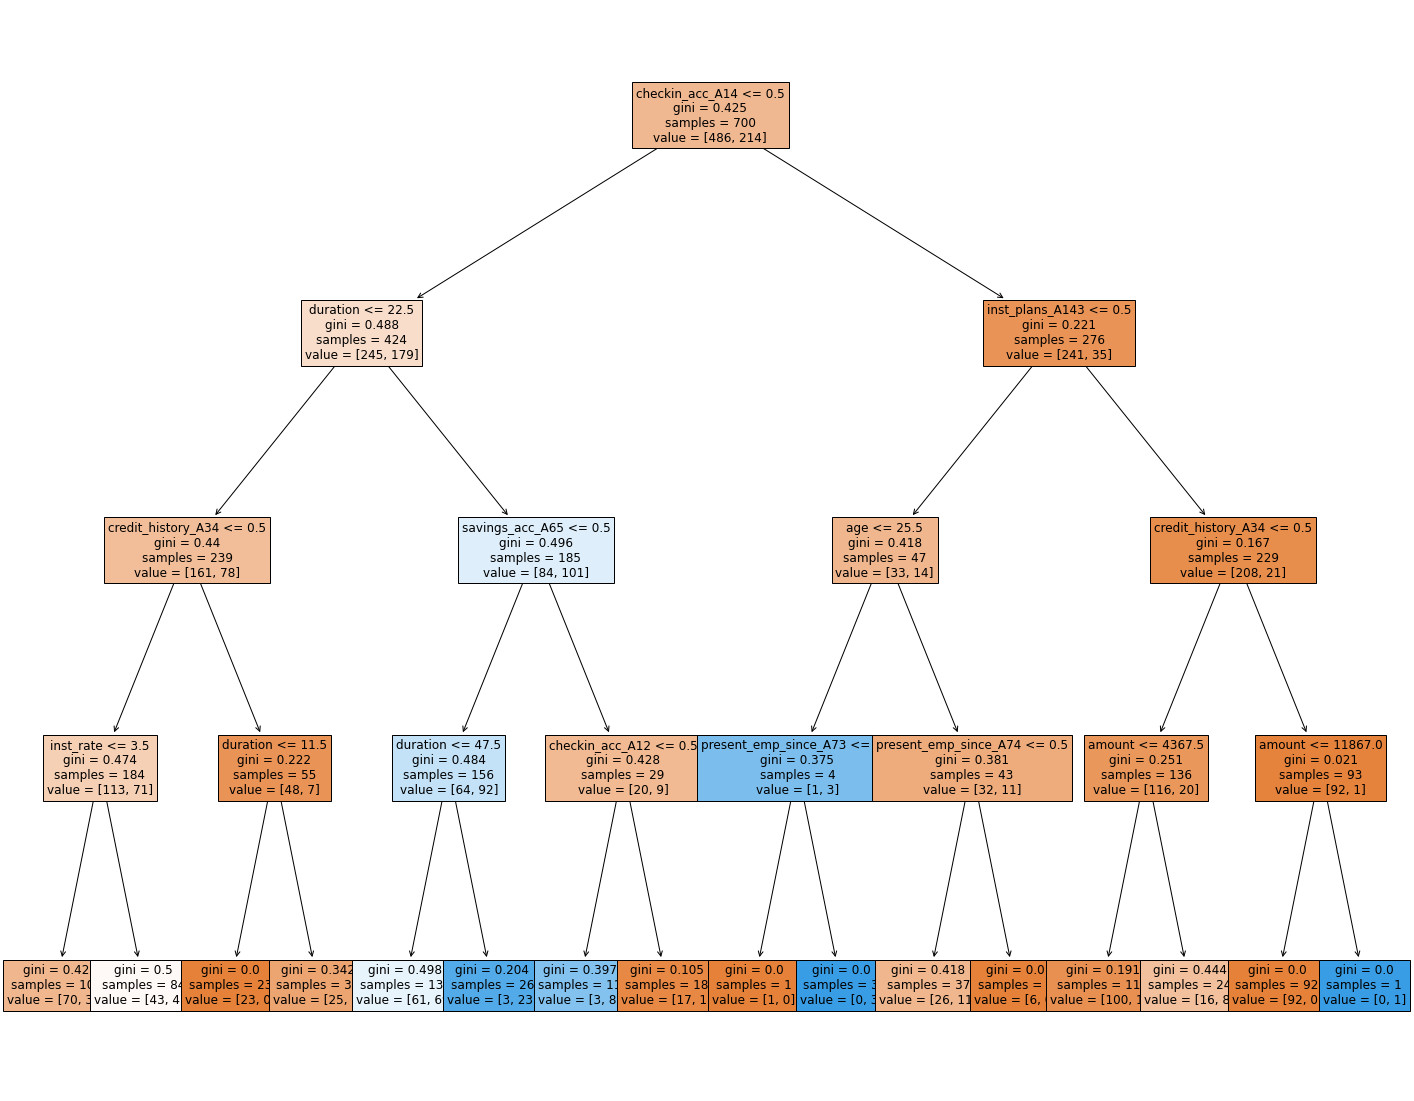

In [32]:
fig = plt.figure(figsize = (25,20))
tree.plot_tree(clf_tree,feature_names = X_variable.columns,filled = True,fontsize = 12)
plt.plot()